<a href="https://colab.research.google.com/github/MarcosRMG/Bootcamp-Alura-Data-Science/blob/main/Projeto_do_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Marcos Galvão

[Linkedin](https://br.linkedin.com/in/marcosrmgalvao)

[Github](https://github.com/MarcosRMG)

[Blog Jogando com Dados](https://jogandocomdados.blogspot.com/)

# **Resumo:**

Houve uma tendência de queda na cobertura de imunização no Brasil, levando em consideração os casos de Sarampo. A queda na imunização acarretou no aumento de casos, especialistas relatam que após uma doença passar por um período de controle a sociedade tende a esquecer a necessidade de imunização por acreditar que a vacina não é mais necessária. 

# **Análise dos dados:**

##Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

##Funções

In [ ]:
def grafico_linhas(dados: pd.DataFrame, titulo: str, x_label: str, y_label: str):
  dados.plot(figsize=(15, 8))
  plt.title(titulo, fontsize=20)
  plt.ylim(0, 120)
  plt.xlabel(x_label, fontsize=15)
  plt.ylabel(y_label, fontsize=15)


#retira os espaços e o "/n"
def trata_html(html_entrada):
  return ' '.join(html_entrada.split()).replace('> <', '><')

##Dados

###DATASUS

Calculo de imunizações: "A fórmula de cálculo da cobertura é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100" (DATASUS, Notas Técnicas)

Leitura dos dados disponíveis no [DATASUS](http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def)

Filtros aplicados:

Imunizações desde 1994 - cobertura

Linha - ano

Coluna - Imuno

Medidas - Cobertura vacinais

Períodos disponíveis - 1994 a 2019

O ano de 2020 nao foi considerado por estar sujeito a alteração.

In [ ]:
fonte_cobertura_imunizacao = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Coberturas%20Vacinais%20por%20Imuno%20segundo%20Ano.csv'


cobertura_imunizacao = pd.read_csv(fonte_cobertura_imunizacao, 
                                   encoding='ISO-8859-1', sep=';',
                                   decimal=',', skipfooter=1, index_col=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



Limpeza dos dados realizado na leitura

encoding - Padrão de leitura do documento

skipfooter - Ignorar a última linha

decimal - Substituir  a vírgula pelo ponto em casas decimais para que o Python interprete a informação como float

index_col - Coluna para ser considerada como índice

Data em que a fonte foi atualizada no DATASUS: 30/11/2020

In [ ]:
cobertura_imunizacao

,BCG,Hepatite B em crianças até 30 dias,Rotavírus Humano,Meningococo C,Hepatite B,Penta,Pneumocócica,Poliomielite,Poliomielite 4 anos,Febre Amarela,Hepatite A,Pneumocócica(1º ref),Meningococo C (1º ref),Poliomielite(1º ref),Tríplice Viral D1,Tríplice Viral D2,Tetra Viral(SRC+VZ),DTP,DTP REF (4 e 6 anos),Tríplice Bacteriana(DTP)(1º ref),Sarampo,Haemophilus influenzae b,Dupla adulto e tríplice acelular gestante,dTpa gestante,Tetravalente (DTP/Hib) (TETRA),Ignorado,Total
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994,88.31,0.00,0.00,0.00,8.85,0.00,0.00,58.24,0.00,5.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,64.76,0.00,0.00,71.37,0.00,0.00,0.00,0.00,4.69,38.27
1995,103.63,0.00,0.00,0.00,10.50,0.00,0.00,77.83,0.00,4.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.54,0.00,0.00,86.86,0.00,0.00,0.00,0.00,23.61,45.71
1996,104.21,0.00,0.00,0.00,16.50,0.00,0.00,80.86,0.00,5.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.25,0.00,0.00,80.40,0.01,0.00,0.00,0.00,42.10,50.01
1997,117.12,0.00,0.00,0.00,5.79,0.00,0.00,89.27,0.00,7.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.50,0.00,0.00,108.61,0.03,0.00,0.00,0.00,106.68,68.95
1998,111.61,0.00,0.00,0.00,12.63,0.00,0.00,95.30,0.00,18.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,92.97,0.00,0.00,95.26,0.84,0.00,0.00,0.00,104.36,70.65
1999,117.28,0.00,0.00,0.00,83.50,0.00,0.00,99.08,0.00,29.06,0.00,0.00,0.00,0.00,6692.10,0.00,0.00,94.46,0.00,0.00,99.31,5.09,0.00,0.00,0.00,100.06,86.57
2000,111.74,0.00,0.00,0.00,91.08,0.00,0.00,101.44,0.00,37.14,0.00,0.00,0.00,0.00,77.50,0.00,0.00,94.71,0.00,0.00,105.35,87.85,0.00,0.00,0.00,80.12,76.50
2001,112.60,0.00,0.00,0.00,91.88,0.00,0.00,102.83,0.00,40.24,0.00,0.00,0.00,0.00,88.43,0.00,0.00,97.45,0.00,0.00,103.85,93.10,0.00,0.00,0.00,83.86,79.85
2002,110.28,0.00,0.00,0.00,91.47,0.00,0.00,100.01,0.00,38.70,0.00,0.00,0.00,0.00,96.92,0.00,0.00,44.69,0.00,0.00,96.02,38.98,0.00,0.00,53.86,81.35,76.09


In [ ]:
cobertura_imunizacao.shape

(26, 27)

###Organização Mundial da Saúde

In [ ]:
url = 'https://apps.who.int/immunization_monitoring/globalsummary/incidences?c=BRA'

response = urlopen(url)
html = response.read().decode('UTF-8')
html = trata_html(html)

In [ ]:
html

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en"><!-- Copyright 2020 The World Health Organization --><!-- All rights Reserved --><head><title>WHO vaccine-preventable diseases: monitoring system. 2020 global summary</title><!-- meta --><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta name="author" content="WHO | World Health Organization" /><meta name="DC.publisher" content="World Health Organization" /><meta name="description" content="The World Health Organization" /><meta name="DC.title" content="WHO | Immunization Country Profile " /><meta name="DC.keywords" content=" immunization [subject], vaccination, immunization [subject], vaccination, mortality [subject], death, death rate, adult mortality, child mortality, neonate mortality, fatal outcome, vaccines [subject]

In [ ]:
#cria objeto soup para utilizar os métodos da biblioteca
soup = BeautifulSoup(html, 'html.parser')

####Casos Sarampo

#####Serie Número de Casos

In [ ]:
#Seleção das linhas com o número de casos do sarampo no Brasil
serie_sarampo = soup('td')[58: 85]

In [ ]:
#Transformação dos dados para string
serie_sarampo = str(serie_sarampo)

In [ ]:
#Transformação da string em listas
serie_sarampo = serie_sarampo.split()

In [ ]:
serie_sarampo

['[<td',
 'align="left"',
 'colspan="4"><a',
 'href="timeseries/tsincidencemeasles.html"',
 'title="Click',
 'for',
 'full',
 'global',
 'time',
 'series',
 'for',
 'Measles">Measles</a></td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 "20'901",
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 "10'330",
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '_',
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '0',
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '214',
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '876',
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '220',
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '2',
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '43',
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '68',
 '</td>,',
 '<td',
 'class="statistics_small"',
 'colspan="1">',
 '0',
 '</td>,',
 '<td'

In [ ]:
#Captura dos casos registrados por ano
item = 15
casos_sarampo = []

for caso in range(26):
  casos_sarampo.append(serie_sarampo[item])
  if item < 115:
    item += 5
  else:
    item += 4

In [ ]:
casos_sarampo

["20'901",
 "10'330",
 '_',
 '0',
 '214',
 '876',
 '220',
 '2',
 '43',
 '68',
 '0',
 '0',
 '0',
 '57',
 '6',
 '0',
 '2',
 '1',
 '1',
 '36',
 '908',
 'colspan="1">2\'781',
 'colspan="1">793',
 'colspan="1">61\'435',
 'colspan="1">75\'993',
 'colspan="1">99\'263']

In [ ]:
#Limpeza das últimas cinco linhas
item = 21

for i in range(5):
  casos_sarampo[item] = casos_sarampo[item][12:]
  item += 1

In [ ]:
#Casos de sarampo
casos_sarampo

["20'901",
 "10'330",
 '_',
 '0',
 '214',
 '876',
 '220',
 '2',
 '43',
 '68',
 '0',
 '0',
 '0',
 '57',
 '6',
 '0',
 '2',
 '1',
 '1',
 '36',
 '908',
 "2'781",
 '793',
 "61'435",
 "75'993",
 "99'263"]

#####Serie períodos

In [ ]:
anos_sarampo = soup('th')

In [ ]:
anos_sarampo = str(anos_sarampo)
anos_sarampo = anos_sarampo.split()

In [ ]:
anos_sarampo

['[<th',
 'align="left"',
 'colspan="4">',
 'Diseases',
 '</th>,',
 '<th',
 'class="year">',
 '2019',
 '</th>,',
 '<th',
 'class="year">',
 '2018',
 '</th>,',
 '<th',
 'class="year">',
 '2017',
 '</th>,',
 '<th',
 'class="year">',
 '2016',
 '</th>,',
 '<th',
 'class="year">',
 '2015',
 '</th>,',
 '<th',
 'class="year">',
 '2014',
 '</th>,',
 '<th',
 'class="year">',
 '2013',
 '</th>,',
 '<th',
 'class="year">',
 '2012',
 '</th>,',
 '<th',
 'class="year">',
 '2011',
 '</th>,',
 '<th',
 'class="year">',
 '2010',
 '</th>,',
 '<th',
 'class="year">',
 '2009',
 '</th>,',
 '<th',
 'class="year">',
 '2008',
 '</th>,',
 '<th',
 'class="year">',
 '2007',
 '</th>,',
 '<th',
 'class="year">',
 '2006',
 '</th>,',
 '<th',
 'class="year">',
 '2005',
 '</th>,',
 '<th',
 'class="year">',
 '2004',
 '</th>,',
 '<th',
 'class="year">',
 '2003',
 '</th>,',
 '<th',
 'class="year">',
 '2002',
 '</th>,',
 '<th',
 'class="year">',
 '2001',
 '</th>,',
 '<th',
 'class="year">',
 '2000',
 '</th>,',
 '<th',
 'cla

In [ ]:
#Seleção dos anos
anos_sarampo_limpo = []
item = 7

for i in range(26):
  anos_sarampo_limpo.append(anos_sarampo[item])
  if item < 91:
    item += 4
  elif item == 91:
    item += 3
  elif item > 92:
    item += 2

In [ ]:
anos_sarampo_limpo

['2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 'class="year"><i>1995</i></th>,',
 'class="year"><i>1990</i></th>,',
 'class="year"><i>1985</i></th>,',
 'class="year"><i>1980</i></th>]']

In [ ]:
#limpeza dos quatro últimos 
item = -4

for i in range(4):
  anos_sarampo_limpo[item] = anos_sarampo_limpo[item][16:20]
  item += 1

In [ ]:
anos_sarampo_limpo

['2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1995',
 '1990',
 '1985',
 '1980']

#####Data Frame

In [ ]:
df_casos_sarampo = pd.DataFrame({
    'Casos': casos_sarampo
}, index=anos_sarampo_limpo)

In [ ]:
df_casos_sarampo.head()

,Casos
2019,20'901
2018,10'330
2017,_
2016,0
2015,214


In [ ]:
#Retirando o seperador de milhar "'"
df_casos_sarampo['Casos'] = df_casos_sarampo['Casos'].str.replace("'", '')

In [ ]:
#Transformar o "-" em NaN para visualização da série. 
df_casos_sarampo['Casos'] = pd.to_numeric(df_casos_sarampo['Casos'], errors='coerce')

In [ ]:
df_casos_sarampo.sort_index(inplace=True)

In [ ]:
df_casos_sarampo.head()

,Casos
1980,99263.0
1985,75993.0
1990,61435.0
1995,793.0
1998,2781.0


In [ ]:
df_casos_sarampo.tail()

,Casos
2015,214.0
2016,0.0
2017,NaN
2018,10330.0
2019,20901.0


In [ ]:
df_casos_sarampo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 1980 to 2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Casos   25 non-null     float64
dtypes: float64(1)
memory usage: 416.0+ bytes


##Tratamentos

###Padronização das colunas

In [ ]:
cobertura_imunizacao.columns = cobertura_imunizacao.columns.str.strip().str.replace(' ', '_').str.replace('__', '_').str.lower()

In [ ]:
cobertura_imunizacao.columns

Index(['bcg', 'hepatite_b_em_crianças_até_30_dias', 'rotavírus_humano',
       'meningococo_c', 'hepatite_b', 'penta', 'pneumocócica', 'poliomielite',
       'poliomielite_4_anos', 'febre_amarela', 'hepatite_a',
       'pneumocócica(1º_ref)', 'meningococo_c_(1º_ref)',
       'poliomielite(1º_ref)', 'tríplice_viral_d1', 'tríplice_viral_d2',
       'tetra_viral(src+vz)', 'dtp', 'dtp_ref_(4_e_6_anos)',
       'tríplice_bacteriana(dtp)(1º_ref)', 'sarampo',
       'haemophilus_influenzae_b', 'dupla_adulto_e_tríplice_acelular_gestante',
       'dtpa_gestante', 'tetravalente_(dtp/hib)_(tetra)', 'ignorado', 'total'],
      dtype='object')

A padronização consistiu em retirar os espaços, substituir os espaços entre as palavras por um underline, substituição de dois underlines por um e colocar todas as letras em minúsculo.

Motivo: Facilitar a busca das informações por colunas.

###Exclusão de colunas

In [ ]:
#Exclusão da coluna total e da coluna Ignorado
cobertura_imunizacao.drop(['total', 'ignorado'], axis=1, inplace=True)

###Alteração de valores

Data a formula de cálculo esperava-se que o valor máximo fosse 100, mas há alguns dados superiores, isso ocorre pelo número de doses ter sido maior do que a população alvo estimada. 

In [ ]:
cobertura_imunizacao['tríplice_viral_d1'].loc[1999]

6692.1

No ano de 1999 foi registrado a imunizacao de 6692.1% na vascina tríplice viral D1, dado inconsistênte com a formula de cálculo e muito superior aos demais dados que foram maior do que a populacao alvo estimada. 

No dia 01/12/2020 enviei um e-mail para gtainfo@saude.gov.br para esclarecer se a informacao constante no ano de 1999 refrerente a Triplice Viral D1 estava correto, em resposta a Thais Minuzzi atuante na Coordenacao Geral do Programa Nacional de Imunizacoes - CGPNI esclareceu que as doses aplicadas podem ser maior do que o pubico alvo estimado, sendo as criancas menores de um ano de idade se utiliza o SINASC (2014) e demais faixas etarias o IBGE (2012) para as estimativas, mas no e-mail nao foi feita referencia direta a imunizacao de 6692.1% de 1999 da Triplice Viral D1.

Para efeito de visualização e considerando a fórmula de cálculo esse número será alterado para 66.92 dado que no ano seguinte foi registrado 77.50.

In [ ]:
#Alterando informação da Tríplice Viral D1 em 1999
cobertura_imunizacao['tríplice_viral_d1'].loc[1999] = 66.92

In [ ]:
cobertura_imunizacao['tríplice_viral_d1']

Ano
1994      0.00
1995      0.00
1996      0.00
1997      0.00
1998      0.00
1999     66.92
2000     77.50
2001     88.43
2002     96.92
2003    112.95
2004    110.93
2005    106.55
2006    105.35
2007    106.80
2008     99.81
2009    103.74
2010     99.93
2011    102.39
2012     99.50
2013    107.46
2014    112.80
2015     96.07
2016     95.41
2017     86.24
2018     92.61
2019     93.12
Name: tríplice_viral_d1, dtype: float64

###Sarampo

In [ ]:
#O período selecionado leva inicia no ano em que a fonte forneceu a informação do número de casos por ano
sarampo_casos_imunizacao = pd.DataFrame({
    'casos': df_casos_sarampo['Casos'][4:],
    'triplice_viral_d1': list(cobertura_imunizacao['tríplice_viral_d1'][4:]),
    'triplice_viral_d2': list(cobertura_imunizacao['tríplice_viral_d2'][4:])},
    index=df_casos_sarampo.index[4:])

In [ ]:
sarampo_casos_imunizacao

,casos,triplice_viral_d1,triplice_viral_d2
1998,2781.0,0.00,0.00
1999,908.0,66.92,0.00
2000,36.0,77.50,0.00
2001,1.0,88.43,0.00
2002,1.0,96.92,0.00
2003,2.0,112.95,0.00
2004,0.0,110.93,0.00
2005,6.0,106.55,0.00
2006,57.0,105.35,0.00
2007,0.0,106.80,0.00


##Visualizações Iniciais

###Presença de valores NaN

Text(0.5, 0, 'Figura 1: Dados faltantes de cobertura vacinal por imuno - 1994 - 2019')

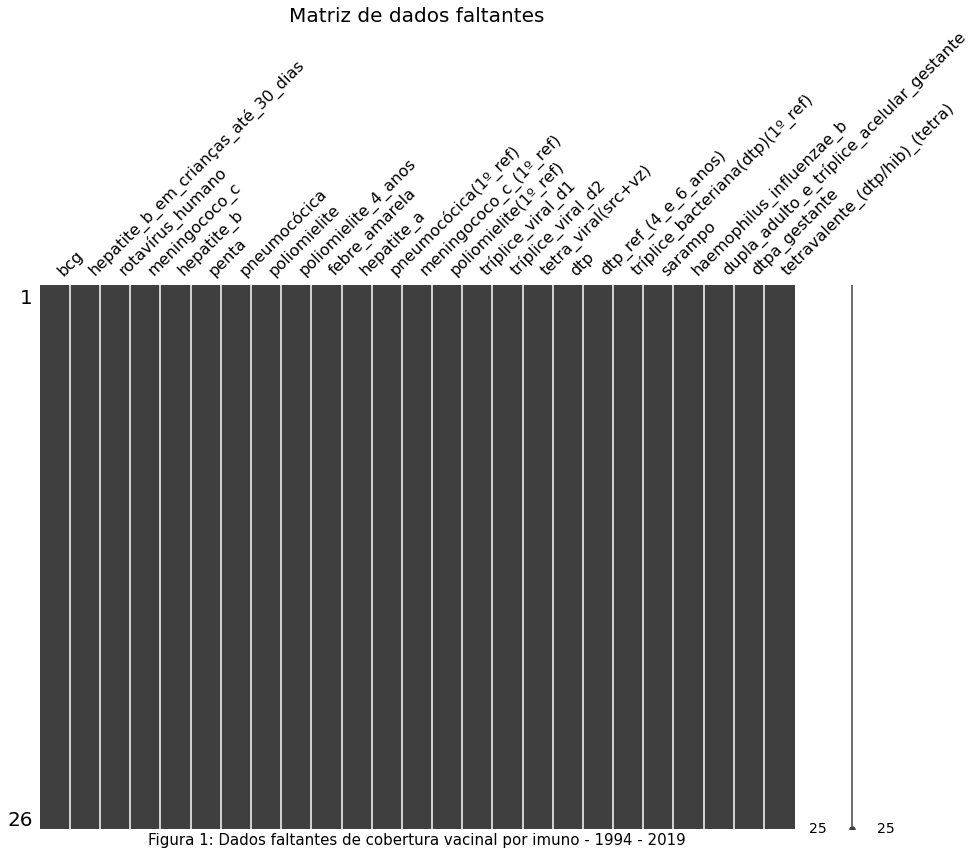

In [ ]:
msno.matrix(cobertura_imunizacao, figsize=(15, 10))
plt.title('Matriz de dados faltantes', fontsize=20)
plt.xlabel('Figura 1: Dados faltantes de cobertura vacinal por imuno - 1994 - 2019',
           fontsize=15)

Nao ha valores NaN na base de dados

###Visualização geral

In [ ]:
sns.set(font_scale=1.5)

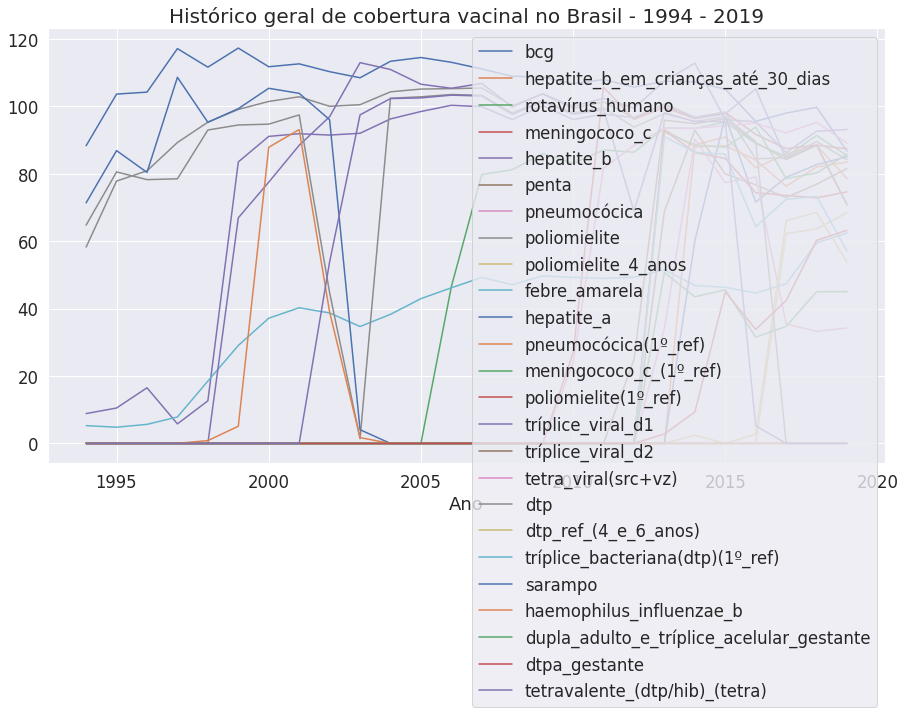

In [ ]:
cobertura_imunizacao.plot(figsize=(15, 8))
plt.title('Histórico geral de cobertura vacinal no Brasil - 1994 - 2019',
          fontsize=20)
plt.show()

O gráfico não possibilita nenhuma constatação dado o número de vacinas representadas na visualização

###Visualização com recorte temporal 2015 - 2019

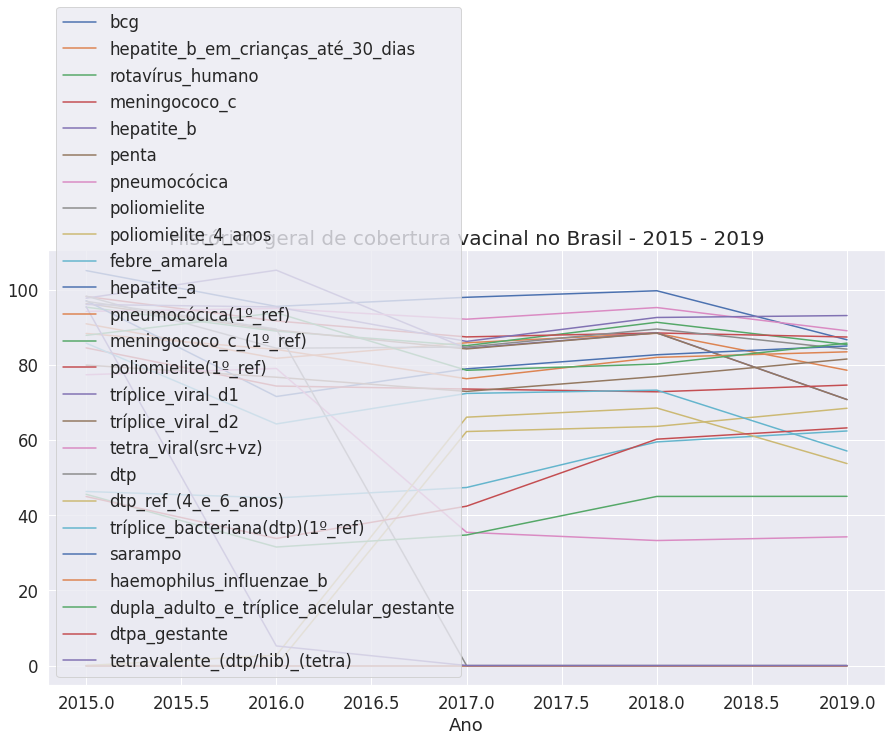

In [ ]:
cobertura_imunizacao.loc[2015:2019].plot(figsize=(15, 8))
plt.title('Histórico geral de cobertura vacinal no Brasil - 2015 - 2019',
          fontsize=20)
plt.legend(loc='lower left')
plt.show()

De um modo geral é possível perceber uma tendência de estabilidade nos dados gerais apos o ano de 2017.

###Visualização das vacinas com registros desde 1994

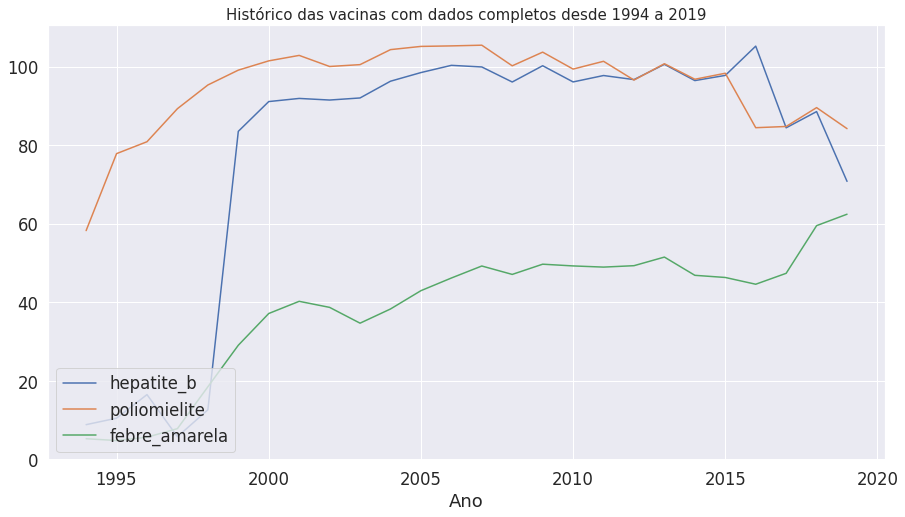

In [ ]:
cobertura_imunizacao[['hepatite_b', 'poliomielite', 'febre_amarela']].plot(figsize=(15, 8))
plt.title('Histórico das vacinas com dados completos desde 1994 a 2019',
          fontsize=15)
plt.legend(loc='lower left')
plt.show()

####Febre Amarela

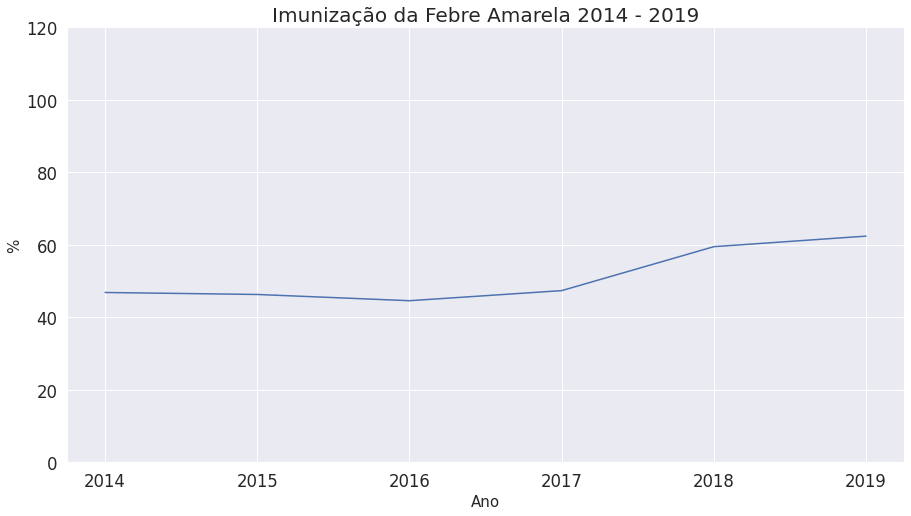

In [ ]:
grafico_linhas(cobertura_imunizacao['febre_amarela'].loc[2014:2019],
               'Imunização da Febre Amarela 2014 - 2019', 'Ano', '%')

In [ ]:
#Calculo do crescimento medio de imunizacao da Febre Amarela
cobertura_imunizacao['febre_amarela'].loc[2016:].diff().mean()

5.939999999999998

In [ ]:
#Imunizacao da Febre Amarela em 2019
cobertura_imunizacao['febre_amarela'].loc[2019]

62.41

Percebe se uma tendência de crescimento na cobertura de imunização da Febre Amarela após uma estabilidade entre o período de 2005 a 2015.

Do periodo de 2016 a 2019 o crescimento medio foi de 5.94%.

Em 2019 62,41% da populacao estimada foi imunizada contra a Febre Amarela.



####Poliomielite

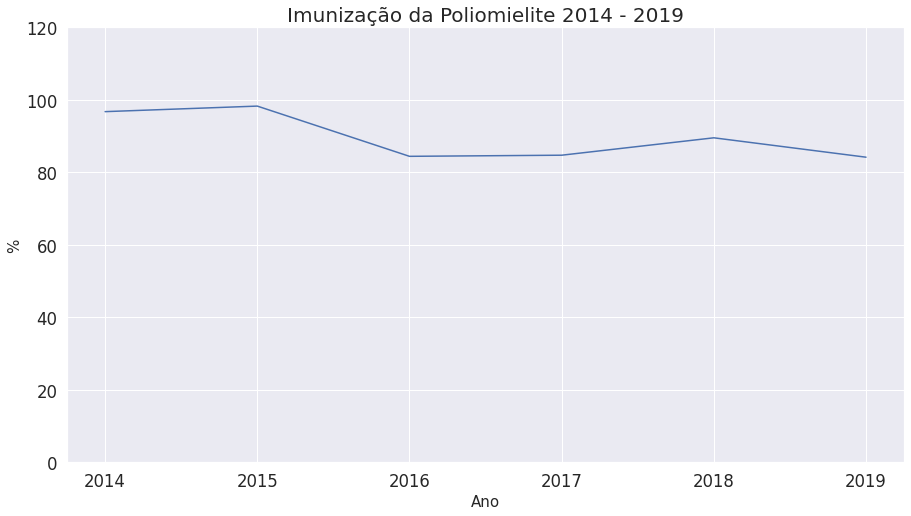

In [ ]:
grafico_linhas(cobertura_imunizacao['poliomielite'].loc[2014:2019],
               'Imunização da Poliomielite 2014 - 2019', 'Ano', '%')


In [ ]:
#Serie historica da poliomielite
cobertura_imunizacao['poliomielite']

Ano
1994     58.24
1995     77.83
1996     80.86
1997     89.27
1998     95.30
1999     99.08
2000    101.44
2001    102.83
2002    100.01
2003    100.48
2004    104.30
2005    105.12
2006    105.25
2007    105.43
2008    100.18
2009    103.66
2010     99.35
2011    101.33
2012     96.55
2013    100.71
2014     96.76
2015     98.29
2016     84.43
2017     84.74
2018     89.54
2019     84.19
Name: poliomielite, dtype: float64

In [ ]:
#Queda da imunizacao da poliomielite
cobertura_imunizacao['poliomielite'].loc[2018] - cobertura_imunizacao['poliomielite'].loc[2019]

5.3500000000000085

In [ ]:
#Queda media da imunizacao da poliomielite
cobertura_imunizacao['poliomielite'].loc[2014:2019].diff().mean()

-2.5140000000000016

A imunização da Poliomielite se manteve superior a 80% desde o ano de 1996 a 2019, porem do ano de 2014 a 2019 observa se uma tendencia de queda, o ano de 2019 foi 5,35% menor comparada ao ano de 2018.

Do periodo de 2014 a 2019 a queda media foi de -2.51%

####Hepatite B

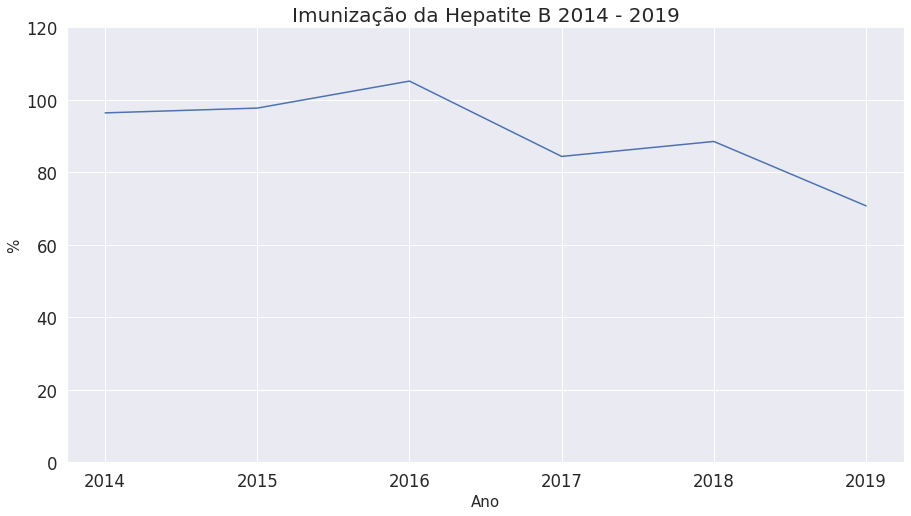

In [ ]:
grafico_linhas(cobertura_imunizacao['hepatite_b'].loc[2014:],
               'Imunização da Hepatite B 2014 - 2019', 'Ano', '%')

In [ ]:
#Serie historica da Hepatite B
cobertura_imunizacao['hepatite_b']

Ano
1994      8.85
1995     10.50
1996     16.50
1997      5.79
1998     12.63
1999     83.50
2000     91.08
2001     91.88
2002     91.47
2003     92.00
2004     96.26
2005     98.46
2006    100.30
2007     99.89
2008     96.06
2009    100.20
2010     96.08
2011     97.71
2012     96.67
2013    100.56
2014     96.42
2015     97.74
2016    105.19
2017     84.40
2018     88.53
2019     70.77
Name: hepatite_b, dtype: float64

In [ ]:
#Queda na imunizacao da Hepatite B
cobertura_imunizacao['hepatite_b'].loc[2018] - cobertura_imunizacao['hepatite_b'].loc[2019]

17.760000000000005

In [ ]:
#Queda media da imunizacao da Hepatite B
cobertura_imunizacao['hepatite_b'].loc[2014:2019].diff().mean()

-5.130000000000001

A mesma tendencia de queda e observada na serie historica da Hepatite B, que se manteve superior a 80% desde  ano de 1999, caindo para 70.77% no ano de 2019, queda de %17.76 comparada ao ano anterior.

Do periodo de 2014 a 2019 a queda media foi de -5.13%.

##De um modo geral ha um tendência de queda da imunização no Brasil?

In [ ]:
cobertura_imunizacao.loc[2015:].T

Ano,2015,2016,2017,2018,2019
bcg,105.08,95.55,97.98,99.72,86.67
hepatite_b_em_crianças_até_30_dias,90.93,81.75,85.88,88.40,78.57
rotavírus_humano,95.35,88.98,85.12,91.33,85.40
meningococo_c,98.19,91.68,87.44,88.49,87.41
hepatite_b,97.74,105.19,84.40,88.53,70.77
penta,96.30,89.27,84.24,88.49,70.76
pneumocócica,94.23,95.00,92.15,95.25,89.07
poliomielite,98.29,84.43,84.74,89.54,84.19
poliomielite_4_anos,0.00,0.00,62.26,63.62,68.45
febre_amarela,46.31,44.59,47.37,59.50,62.41


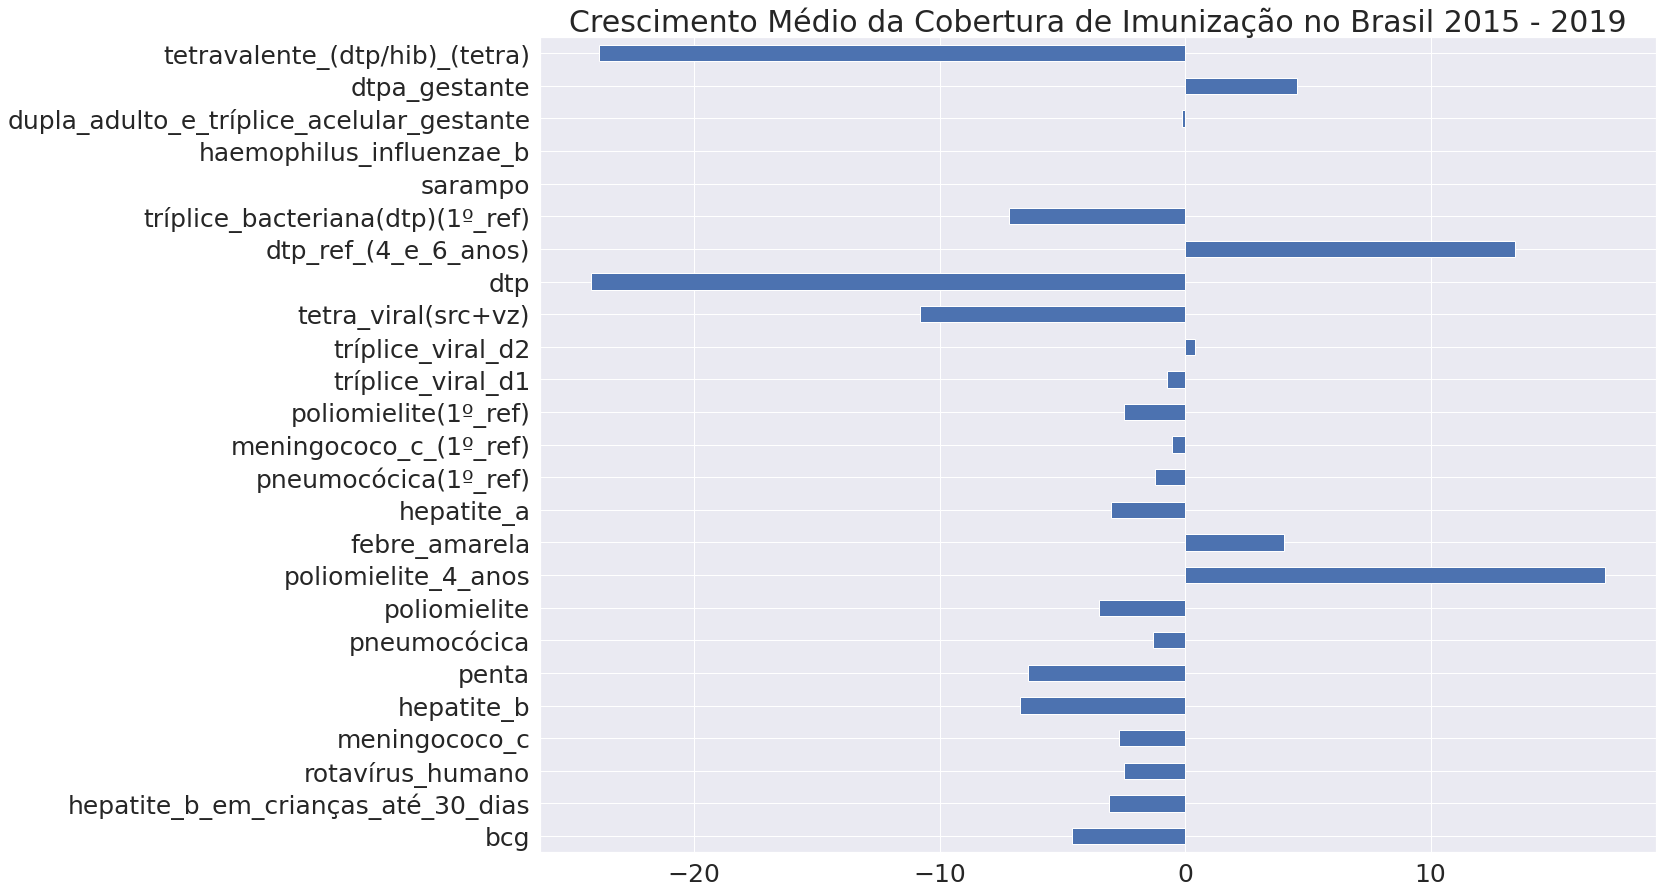

In [ ]:
cobertura_imunizacao.loc[2015:].diff().mean().plot(kind='barh', figsize=(20, 15),
                                                   fontsize=25)
plt.title('Crescimento Médio da Cobertura de Imunização no Brasil 2015 - 2019',fontsize=30)
plt.show()

A visão geral dos dados considerando o período de 2015 a 2019 é possível notar que em sua maioria houve queda na imunização no período considerado. 

Vacinas que apresentaram crescimento: DTPA Gestante, DTP (4 e 6 anos), Febre Amarela e Poliomielite (4 anos)

Todas as demais vacinas apresentam queda e duas vacinas apresentam valores zerados. 

Uma variável que deve ser considerada é a periodicidade da vacinação, o número de pessoas alvo no ano pode influenciar nos dados de cobertura. 

Outro fator é a subsitituição de uma vacina por outra, que passa a registrar cobertura igual a zero para a vacina substituída. 

##Por que não houve imunização contra o Sarampo no período de 2015 a 2019? 

"Em 2003, a vacina contra sarampo em menores de 1 ano foi retirada do calendário vacinal, sendo substituída pela vacina tríplice viral
(SCR - sarampo/caxumba/rubéola) para aplicação nas crianças de 1 ano de idade na rotina e menores de 5 anos em campanhas de
seguimento." (DATASUS, Nota Técnica)

In [ ]:
cobertura_imunizacao['sarampo']

Ano
1994     71.37
1995     86.86
1996     80.40
1997    108.61
1998     95.26
1999     99.31
2000    105.35
2001    103.85
2002     96.02
2003      4.06
2004      0.00
2005      0.00
2006      0.00
2007      0.00
2008      0.00
2009      0.00
2010      0.00
2011      0.00
2012      0.00
2013      0.00
2014      0.00
2015      0.00
2016      0.00
2017      0.00
2018      0.00
2019      0.00
Name: sarampo, dtype: float64

##Qual o histórico da cobertura da imunização com a vacina tríplice viral (SCR - sarmapo, caxumba e rubeola)?

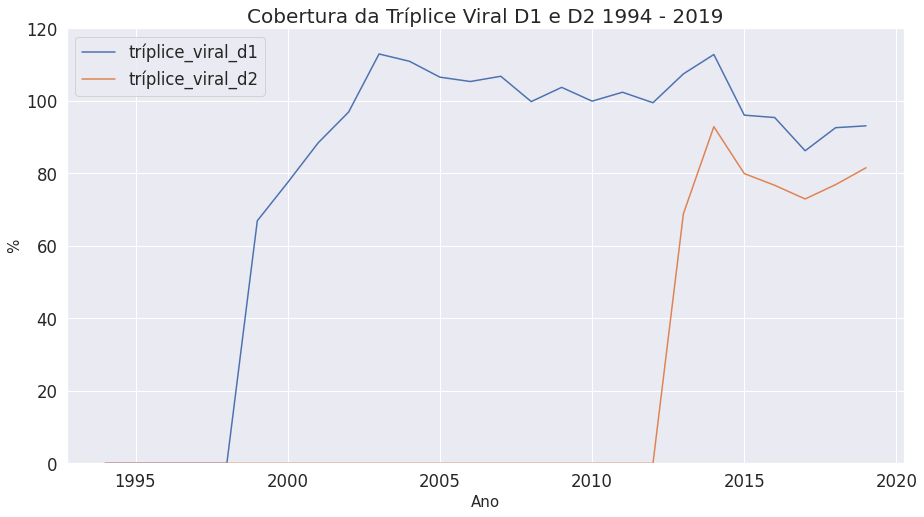

In [ ]:
grafico_linhas(cobertura_imunizacao[['tríplice_viral_d1', 'tríplice_viral_d2']],
               'Cobertura da Tríplice Viral D1 e D2 1994 - 2019', 'Ano', '%')

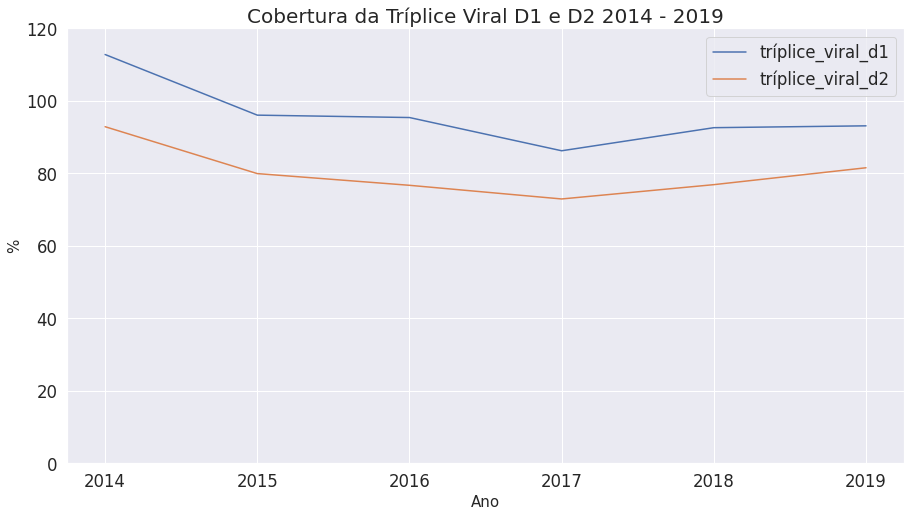

In [ ]:
grafico_linhas(cobertura_imunizacao[['tríplice_viral_d1', 'tríplice_viral_d2']].loc[2014:],
               'Cobertura da Tríplice Viral D1 e D2 2014 - 2019', 'Ano', '%')

Ambas as vacinas tiveram uma queda na cobertura a partir do ano de 2015, com recuperação no ano de 2018. 

##A queda na cobertura da Tríplice Viral impactou no número de casos do Sarampo?

###Sarampo

Sarampo é uma doença infecciosa grave, causada por um vírus, e pode ser fatal. A única maneira de evitar o sarampo é por meio da vacinação.

Transmissão:

O vírus se instala na mucosa do nariz e dos seios da face para se reproduzir e depois vai para a corrente sanguínea. O sarampo é tão contagioso que uma pessoa infectada pode transmitir a doença para 90% das pessoas próximas que não estejam imunizadas. A transmissão pode ocorrer entre 4 dias antes e 4 dias depois do aparecimento de manchas vermelhas pelo corpo. Despois do contato com alguém doente, a pessoa pode apresentar os sintomas em média após 10 dias, variando de 7 a 18 dias. (Ministério da Saúde)

In [ ]:
fig_casos_sarampo = go.Figure()

fig_casos_sarampo.add_trace(go.Bar(x=df_casos_sarampo.index, 
                                 y = df_casos_sarampo['Casos'],
                                 showlegend = False,
                                 marker_color = '#f8d49d'))

fig_casos_sarampo.update_layout(title_text = 'Casos reportados de Sarampo - Brasil (1980 - 2019)',
                              xaxis_title_text = 'Anos',
                              yaxis_title_text = 'Número de casos reportados',
                              template = 'plotly')

fig_casos_sarampo.show()

In [ ]:
fig_cobertura_triplice_viral = go.Figure()

fig_cobertura_triplice_viral.add_trace(go.Bar(x=cobertura_imunizacao.index[4:], 
                                 y = cobertura_imunizacao['tríplice_viral_d1'][4:],
                                 showlegend = True,
                                 marker_color = 'red',
                                 name='Tríplice Viral D1'))

fig_cobertura_triplice_viral.add_trace(go.Bar(x=cobertura_imunizacao.index[4:], 
                                 y = cobertura_imunizacao['tríplice_viral_d2'][4:],
                                 showlegend = True,
                                 marker_color = 'blue',
                                 name='Tríplice Viral D2'))

fig_cobertura_triplice_viral.update_layout(title_text = 'Cobertura da Vacina Tríplice Viral - Brasil (1998 - 2019)',
                              xaxis_title_text = 'Anos',
                              yaxis_title_text = '%',
                              template = 'plotly')

fig_cobertura_triplice_viral.show()

In [ ]:
#Número de casos de sarampo no período de 1980 a 1990
df_casos_sarampo.loc['1980':'1990'].sum()

Casos    236691.0
dtype: float64

In [ ]:
#Numero de casos de sarampo no período de 2000 a 2016
df_casos_sarampo.loc['2000':'2016'].sum()

Casos    1526.0
dtype: float64

In [ ]:
#Média anual de casos de sarampo no período de 2000 a 2016
round(df_casos_sarampo.loc['2000':'2016'].mean())

Casos    90.0
dtype: float64

In [ ]:
#Número de casos no período de 2018 a 2019.
df_casos_sarampo.loc['2018':].sum()

Casos    31231.0
dtype: float64

In [ ]:
#Número de casos no período de 1995 a 2017.
df_casos_sarampo.loc['1995':'2017'].sum()

Casos    6008.0
dtype: float64

O período de 1980 a 1990 registrou o maior número de casos reportados no Brasil com 236.691 casos;

No período de 2000 a 2016 a doênça foi controlada pela cobertura de imunização, registrado 1526 casos nos 16 anos, em média 90 casos por ano;

No ano de 2017 a 2019 houve um aumento expressivo no número de casos, registrando 31.231 pessoas infectadas. 

In [ ]:
fig_casos_sarampo = go.Figure()

fig_casos_sarampo.add_trace(go.Bar(x=df_casos_sarampo.index[-2:], 
                                 y = df_casos_sarampo['Casos'].loc['2018':],
                                 showlegend = False,
                                 marker_color = '#f8d49d'))

fig_casos_sarampo.update_layout(title_text = 'Casos reportados de Sarampo - Brasil (2018 - 2019)',
                              xaxis_title_text = 'Anos',
                              yaxis_title_text = 'Número de casos reportados',
                              template = 'plotly')

fig_casos_sarampo.show()

In [ ]:
#Criar máscara para recortar o mapa de correlação
mask = np.zeros_like(sarampo_casos_imunizacao.corr())
mask[np.triu_indices_from(mask)] = True

Text(0.5, 1.0, 'Mapa de Correlação - Tríplice Viral x Casos de Sarampo')

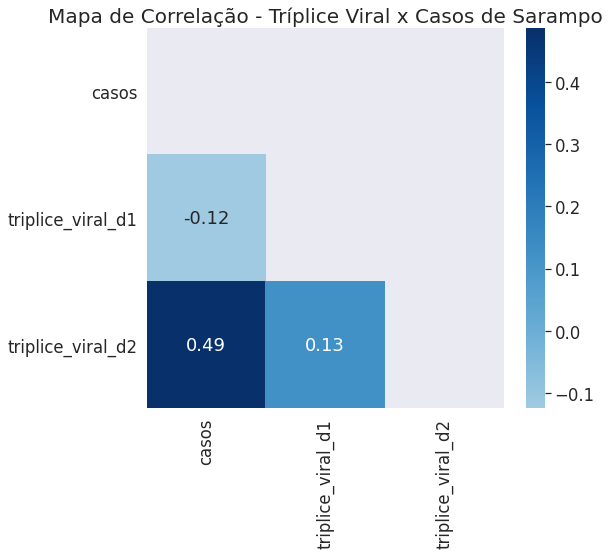

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(sarampo_casos_imunizacao.corr(), cmap='Blues', annot=True, mask=mask,
            center=0)
plt.title('Mapa de Correlação - Tríplice Viral x Casos de Sarampo', fontsize=20)

<Figure size 1080x576 with 0 Axes>

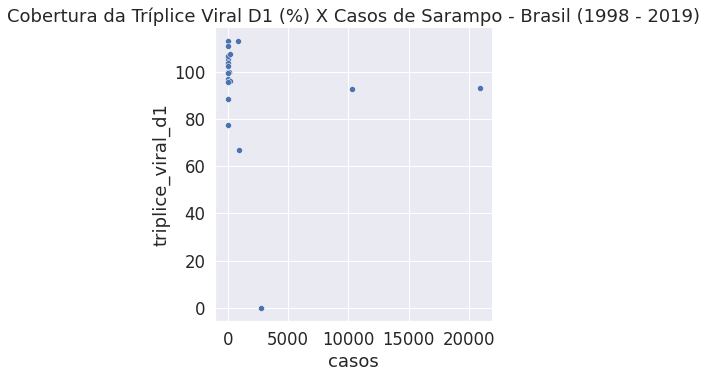

In [ ]:
plt.figure(figsize=(15, 8))
sns.relplot(x='casos', y='triplice_viral_d1', data=sarampo_casos_imunizacao)
plt.title('Cobertura da Tríplice Viral D1 (%) X Casos de Sarampo - Brasil (1998 - 2019)')
plt.show()

<Figure size 1080x576 with 0 Axes>

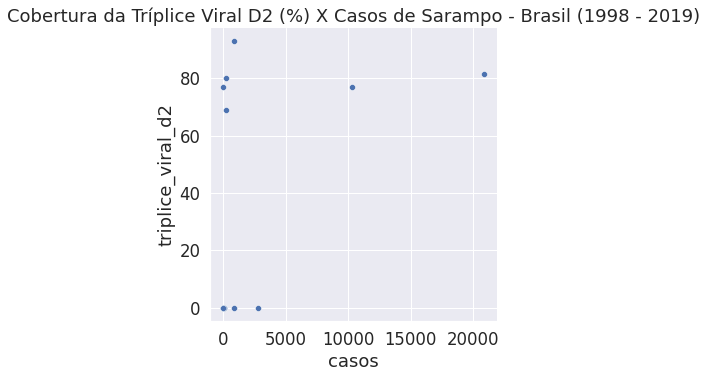

In [ ]:
plt.figure(figsize=(15, 8))
sns.relplot(x='casos', y='triplice_viral_d2', data=sarampo_casos_imunizacao)
plt.title('Cobertura da Tríplice Viral D2 (%) X Casos de Sarampo - Brasil (1998 - 2019)')
plt.show()

Existe correlação negativa entre o número de casos e a cobertura de imunização com a vacina tríplice viral D1, a diminuição da imunização acarreta no aumento de casos.  

#**Considerações Finais**

Os dados revelam queda na cobertura vacinal no Brasil, e aumento expressivo no numero de casos considerando o Sarampo, pesquisas complementares sao necessarias para revelar o que tem provocado essa queda para que ações preventivas posssam ser realizadas para interrupção da tendência da queda da imunização obervada.

#**Referências**

DATASUS. Imunizações Cobertura – desde 1994 Notas Técnicas. Disponível em: http://tabnet.datasus.gov.br/cgi/pni/Imun_cobertura_desde_1994.pdf. Acesso em: 30 Nov. 2020.

DATASUS. Imunizações Cobertura - desde 1994. Disponível em: http://tabnet.datasus.gov.br/cgi/dhdat.exe?bd_pni/cpnibr.def. Acesso em: 01 Dez. 2020.

Ministério da Saúde. Biblioteca Virtual em Saúde - Sarampo: sintomas, prevenção, causas, complicações e tratamento. Disponível em: http://bvsms.saude.gov.br/ultimas-noticias/3025-sarampo-sintomas-prevencao-causas-complicacoes-e-tratamento. Acesso em: 16 Dez. 2020.

WHO. WHO vaccine-preventable diseases: monitoring system. 2020 global summary. Disponível em: https://apps.who.int/immunization_monitoring/globalsummary/incidences?c=BRA. Acesso em: 06 Dez. 2020.